In [406]:
import os
import wave
import struct
import pandas as pd
import scipy
from scipy import signal
from scipy.fft import fftshift

import numpy as np
np.random.seed(seed=42)
import seaborn as sns

import matplotlib.pyplot as plt 
import matplotlib.pylab as plab

import IPython.display as ipd
import librosa
import librosa.display

# Funções auxiliares

In [308]:
def plot_wave(caminho, titulo):    
    data, sample_rate = librosa.load(caminho)
    print("Frequência do áudio: ", sample_rate)
    librosa.display.waveplot(data,sr=sample_rate)
    plt.title(titulo)
    plt.xlabel("Tempo")
    plt.ylabel("Amplitude")   
    
def plot_fft_wave(caminho, titulo, x_limits):
    data, sample_rate = librosa.load(caminho)
    n = len(data)
    T = 1/sample_rate
    yf = scipy.fft.fft(data) #Aplica a FFT no audio
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2) #Cria um array contendo os pontos de x correspondentes ao yf
    
    fig, ax = plt.subplots()
    
    ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    ax.set_xlim(x_limits)
    plt.grid()
    plt.xlabel("Frequência")
    plt.ylabel("Magnitude")
    plt.title(titulo)
    
def plot_wave_with_fft(caminho):
    data, sample_rate = librosa.load(caminho)
    n = len(data)
    T = 1/sample_rate
    yf = scipy.fft.fft(data) #Aplica a FFT no audio
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2) #Cria um array contendo os pontos de x correspondentes ao yf
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 2, 1)
    librosa.display.waveplot(data,sr=sample_rate)
    plt.xlabel("Tempo")
    plt.ylabel("Amplitude")
    plt.title("Onda")
    
    plt.subplot(1, 2, 2)
    plt.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.xlim(0, 2000)
    plt.xlabel("Frequência")
    plt.ylabel("Magnitude")
    plt.title("FFT")
    
def plot_multiple_FFT(lista_caminhos, xlim=[0,2000]):
    plt.figure(figsize=(15, 10))
    plt.grid()
    plt.xlabel("Frequência")
    plt.xlim(xlim)
    plt.ylabel("Magnitude")    
    
    for caminho in lista_caminhos:
        data, sample_rate = librosa.load(caminho)
        n = len(data)
        T = 1/sample_rate
        yf = scipy.fft.fft(data) #Aplica a FFT no audio
        xf = np.linspace(0.0, 1.0/(2.0*T), n//2) #Cria um array contendo os pontos de x correspondentes ao yf

        plt.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    
    plt.legend(lista_caminhos)
        
def spectrograma(caminho):
    x, fs = librosa.load(caminho)
    f, t, Sxx = signal.spectrogram(x, fs)
    plt.pcolormesh(t, f, Sxx, shading='gouraud')
    plt.ylabel('Frequência [Hz]')
    plt.xlabel('Tempo [sec]')

# Analise do cenário em som ambiente

In [170]:
base_path = '../Obtenção de dados/Saídas/'
base_path

'../Obtenção de dados/Saídas/1 - Som ambiente/'

# Carregar os dados

In [171]:
tests_path = ['0 - Regime Normal/', 
              '1 - Falta de tensão/', 
              '2 - Sobrecarga/', 
              '3 - Desbalanceamento do eixo/']

tests_path

['0 - Regime Normal/',
 '1 - Falta de tensão/',
 '2 - Sobrecarga/',
 '3 - Desbalanceamento do eixo/']

In [172]:
os.listdir(base_path)

['0 - Regime Normal',
 '1 - Falta de tensão',
 '3 - Desbalanceamento do eixo',
 '2 - Sobrecarga']

### Encontrar o caminho completo de todos os arquivos

In [173]:
all_files = []

for f in tests_path:    
    all_files = all_files + [(base_path + f + i, f) for i in os.listdir(base_path + f)]

all_files

[('../Obtenção de dados/Saídas/1 - Som ambiente/0 - Regime Normal/2021-05-26 20:53:43.925687.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/1 - Som ambiente/0 - Regime Normal/2021-05-26 20:53:12.448972.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/1 - Som ambiente/0 - Regime Normal/2021-05-26 20:54:13.613173.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/1 - Som ambiente/0 - Regime Normal/2021-05-26 20:54:48.132438.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/1 - Som ambiente/0 - Regime Normal/2021-05-26 20:54:01.121870.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/1 - Som ambiente/0 - Regime Normal/2021-05-26 20:53:24.358845.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/1 - Som ambiente/0 - Regime Normal/2021-05-26 20:54:25.130846.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/1 - Som ambiente/0 - Regime Normal/2021-05-26 20:54:37.037314.wav',
  '0 - Regime Normal/'),
 ('../Ob

## Carregar os arquivos e adiciona-los em um conjunto manipulável

#### Exemplo para um arquivo

In [174]:
import wave
import struct

CHUNK = 1024 * 2

some_file = '../Obtenção de dados/Saídas/1 - Som ambiente/0 - Regime Normal/2021-05-26 20:53:43.925687.wav'
wave_file = wave.open(some_file, 'rb')
data = wave_file.readframes(CHUNK)
dataInt = struct.unpack(str(CHUNK) + 'h', data)

#### Carregar todos

In [175]:
df_audio = pd.DataFrame()

for f, c in all_files:
    df_aux = pd.DataFrame()
    
    wave_file = wave.open(f, 'rb')
    data = wave_file.readframes(CHUNK)
    dataInt = struct.unpack(str(CHUNK) + 'h', data)
    
    df_aux = df_aux.append(pd.Series(dataInt), ignore_index=True)
    df_aux['class'] = c
    df_audio = pd.concat([df_audio, df_aux])
    
    
    
df_audio = df_audio.reset_index(drop=True)
df_audio.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,class
0,3013.0,3016.0,3099.0,3115.0,3074.0,3058.0,3047.0,2989.0,2858.0,2727.0,...,998.0,946.0,885.0,837.0,728.0,586.0,487.0,406.0,278.0,0 - Regime Normal/
1,2305.0,2196.0,2092.0,2028.0,1909.0,1807.0,1776.0,1839.0,1902.0,1943.0,...,-1234.0,-1330.0,-1386.0,-1403.0,-1380.0,-1344.0,-1329.0,-1344.0,-1366.0,0 - Regime Normal/
2,-1040.0,-939.0,-852.0,-810.0,-815.0,-925.0,-912.0,-820.0,-719.0,-682.0,...,2018.0,2106.0,2234.0,2238.0,2107.0,2069.0,1971.0,1898.0,1981.0,0 - Regime Normal/
3,2893.0,2965.0,3006.0,3076.0,3173.0,3177.0,3174.0,3161.0,3144.0,3099.0,...,3965.0,3978.0,4080.0,4123.0,4145.0,4037.0,3912.0,3832.0,3870.0,0 - Regime Normal/
4,3784.0,3734.0,3694.0,3643.0,3564.0,3469.0,3402.0,3410.0,3453.0,3463.0,...,2228.0,2182.0,2135.0,2098.0,2091.0,2099.0,2164.0,2179.0,2191.0,0 - Regime Normal/


## Salvar os dados em um conjunto intermediário

In [176]:
df_audio.to_csv('Saídas/dados_carregados.csv')

### Verificar a quantidade de amostras por classe

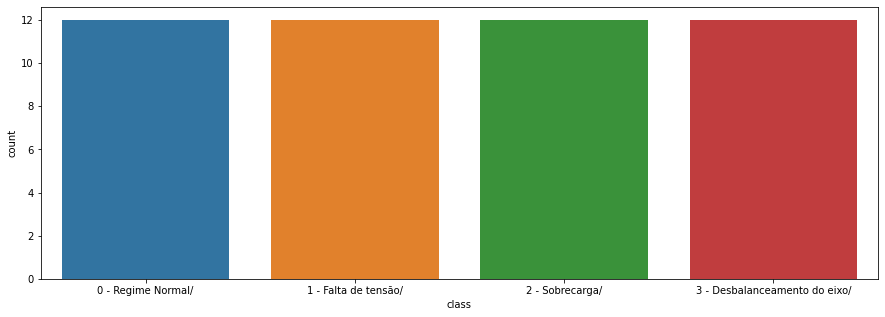

In [177]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_audio, x = 'class');

# Análise das formas de onda no dominio da transformada

In [309]:
regime_normal = all_files[0][0]
falta_tensao = all_files[14][0]
sobrecarga = all_files[24][0]
desbalanceado = all_files[36][0]

### Regime normal

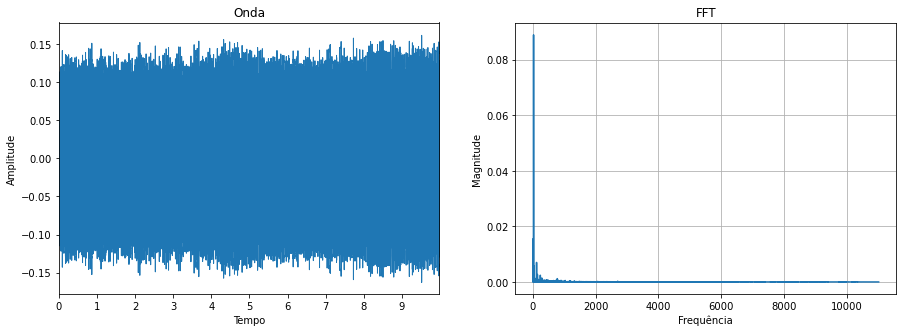

In [310]:
plot_wave_with_fft(regime_normal)

### Falta de tensão

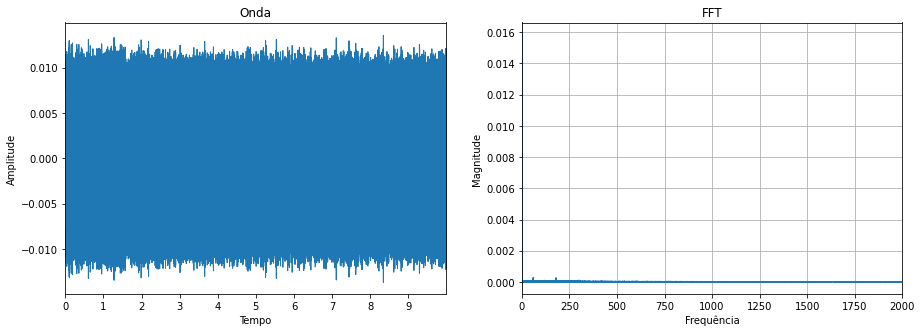

In [289]:
plot_wave_with_fft(falta_tensao)

### Sobrecarga

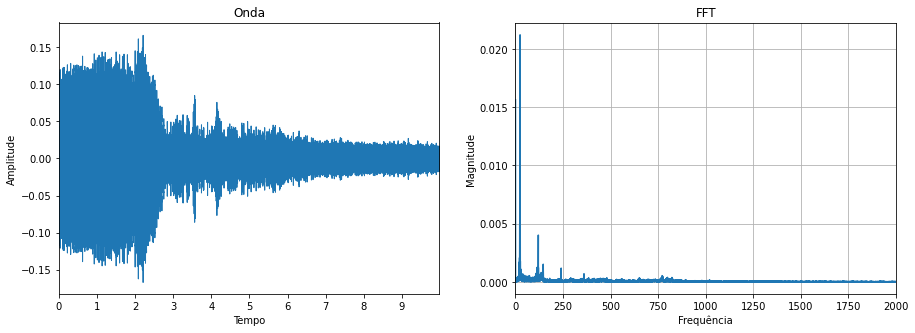

In [181]:
plot_wave_with_fft(sobrecarga)

### Desbalanceamento

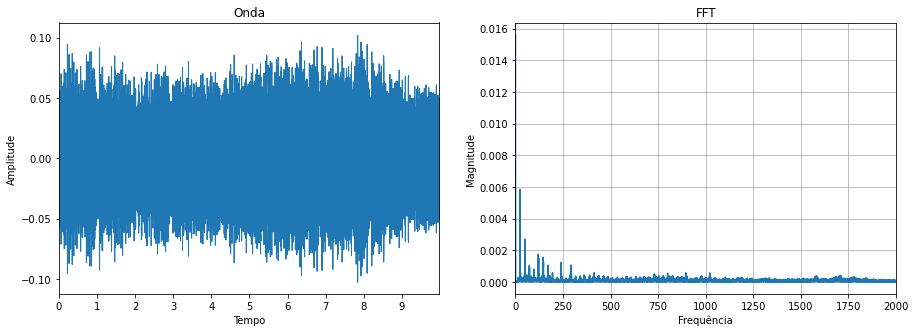

In [182]:
plot_wave_with_fft(desbalanceado)

### Notas observadas

* Pouca variação no espectro
* A aplicacao de um filtro passa alta pode ser interessante visto que a sobrecarga e o regime normal em baixas frequencias sao muito semelhantes

### Considerações no processamento
* Experimentar um modo hibrido de treinamento caso não se tenha um bom desempenho apenas com a FFT\

# Resumo das faixas de frequência

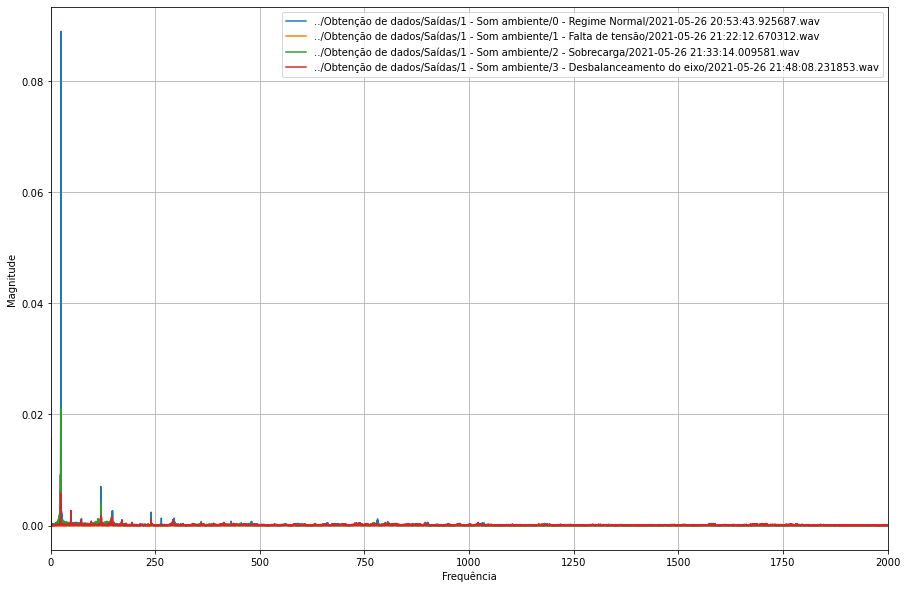

In [493]:
lista_fft = [
    regime_normal,
    falta_tensao,
    sobrecarga,
    desbalanceado
]

plot_multiple_FFT(lista_fft)

### Notas:
* Amplo espectro com baixa variação 

# Análise com Espectograma 

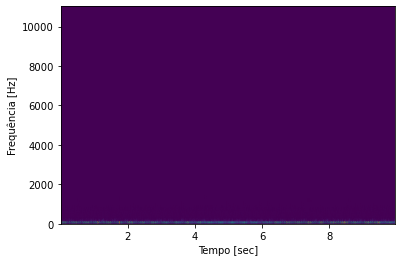

In [17]:
spectrograma(regime_normal)

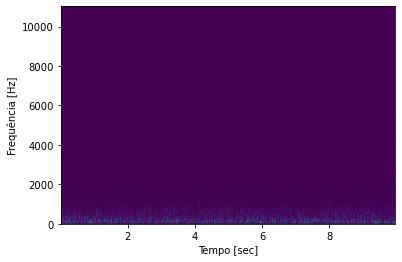

In [18]:
spectrograma(falta_tensao)

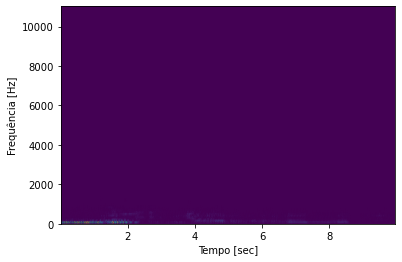

In [19]:
spectrograma(sobrecarga)

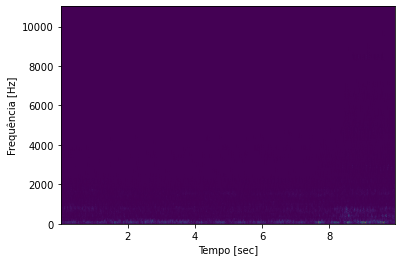

In [20]:
spectrograma(desbalanceado)

### Notas
* A variação da frequência no tempo fica um pouco mais evidente com o uso do espectrograma

# 1º Teste: Conjunto de dados cru sem aplicação da FFT

In [3]:
import pandas as pd

df_audio = pd.read_csv('Saídas/dados_carregados.csv', index_col=0)
df_audio.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,class
0,3013.0,3016.0,3099.0,3115.0,3074.0,3058.0,3047.0,2989.0,2858.0,2727.0,...,998.0,946.0,885.0,837.0,728.0,586.0,487.0,406.0,278.0,0 - Regime Normal/
1,-551.0,-399.0,-394.0,-418.0,-445.0,-379.0,-283.0,-310.0,-253.0,-125.0,...,2240.0,2329.0,2438.0,2558.0,2550.0,2380.0,2297.0,2343.0,2320.0,0 - Regime Normal/
2,-1305.0,-1221.0,-1244.0,-1234.0,-1137.0,-1079.0,-1059.0,-982.0,-876.0,-825.0,...,1160.0,1007.0,991.0,1121.0,1205.0,1166.0,1145.0,1054.0,960.0,0 - Regime Normal/
3,2893.0,2965.0,3006.0,3076.0,3173.0,3177.0,3174.0,3161.0,3144.0,3099.0,...,3965.0,3978.0,4080.0,4123.0,4145.0,4037.0,3912.0,3832.0,3870.0,0 - Regime Normal/
4,2305.0,2196.0,2092.0,2028.0,1909.0,1807.0,1776.0,1839.0,1902.0,1943.0,...,-1234.0,-1330.0,-1386.0,-1403.0,-1380.0,-1344.0,-1329.0,-1344.0,-1366.0,0 - Regime Normal/


### Separação de entradas e saídas

In [4]:
X = df_audio.drop(['class'], axis=1)
y = df_audio['class']

### Encode das saidas

In [5]:
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()

y = lbl_enc.fit_transform(y)

## Separação treino e teste 

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Experimentação com algoritmos tradicionais 

In [23]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
        
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.600


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.200


NuSVC(gamma='auto', probability=True)
model score: 0.200


DecisionTreeClassifier()
model score: 0.200


RandomForestClassifier()
model score: 0.200


AdaBoostClassifier()
model score: 0.200


GradientBoostingClassifier()
model score: 0.300




## Experimentação com Algoritimo de aprendizagem profunda

In [26]:
from keras.models import Sequential
from keras.layers import Dense

In [27]:
model = Sequential()
model.add(Dense(12, input_dim=2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
X_train_deep = np.asarray(X_train)
y_train_deep = np.asarray(y_train)
X_test_deep = np.asarray(X_test)
y_test_deep = np.asarray(y_test)

In [30]:
model.fit(X_train_deep, y_train_deep, epochs=1000, batch_size=100)

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 27.4933 - accuracy: 0.4211
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: -76.8779 - accuracy: 0.2632
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: -274.5010 - accuracy: 0.2632
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: -521.5233 - accuracy: 0.3947
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: -854.6649 - accuracy: 0.3421
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: -1299.5940 - accuracy: 0.3158
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: -1858.7993 - accuracy: 0.2632
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: -2558.5505 - accuracy: 0.3684
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: -3407.5999 - accuracy: 0.3684
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: -4415.7085 - accu

1/1 [==============================] - 0s 1ms/step - loss: -33099386.0000 - accuracy: 0.3421
Epoch 156/1000
1/1 [==============================] - 0s 2ms/step - loss: -33896372.0000 - accuracy: 0.4211
Epoch 157/1000
1/1 [==============================] - 0s 2ms/step - loss: -34704732.0000 - accuracy: 0.3947
Epoch 158/1000
1/1 [==============================] - 0s 2ms/step - loss: -35528096.0000 - accuracy: 0.3947
Epoch 159/1000
1/1 [==============================] - 0s 6ms/step - loss: -36363764.0000 - accuracy: 0.3684
Epoch 160/1000
1/1 [==============================] - 0s 2ms/step - loss: -37213856.0000 - accuracy: 0.3684
Epoch 161/1000
1/1 [==============================] - 0s 5ms/step - loss: -38077708.0000 - accuracy: 0.4211
Epoch 162/1000
1/1 [==============================] - 0s 2ms/step - loss: -38954400.0000 - accuracy: 0.3947
Epoch 163/1000
1/1 [==============================] - 0s 8ms/step - loss: -39846200.0000 - accuracy: 0.3947
Epoch 164/1000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: -361079712.0000 - accuracy: 0.4211
Epoch 306/1000
1/1 [==============================] - 0s 2ms/step - loss: -365061760.0000 - accuracy: 0.4474
Epoch 307/1000
1/1 [==============================] - 0s 2ms/step - loss: -369086560.0000 - accuracy: 0.4211
Epoch 308/1000
1/1 [==============================] - 0s 1ms/step - loss: -373125888.0000 - accuracy: 0.3421
Epoch 309/1000
1/1 [==============================] - 0s 2ms/step - loss: -377201920.0000 - accuracy: 0.3421
Epoch 310/1000
1/1 [==============================] - 0s 2ms/step - loss: -381319136.0000 - accuracy: 0.3684
Epoch 311/1000
1/1 [==============================] - 0s 2ms/step - loss: -385451776.0000 - accuracy: 0.4211
Epoch 312/1000
1/1 [==============================] - 0s 1ms/step - loss: -389606752.0000 - accuracy: 0.4211
Epoch 313/1000
1/1 [==============================] - 0s 1ms/step - loss: -393804608.0000 - accuracy: 0.3947
Epoch 314/1000
1/1 [==============

1/1 [==============================] - 0s 1ms/step - loss: -1322548096.0000 - accuracy: 0.4474
Epoch 455/1000
1/1 [==============================] - 0s 2ms/step - loss: -1331787392.0000 - accuracy: 0.3947
Epoch 456/1000
1/1 [==============================] - 0s 1ms/step - loss: -1341093376.0000 - accuracy: 0.3421
Epoch 457/1000
1/1 [==============================] - 0s 1ms/step - loss: -1350444032.0000 - accuracy: 0.3421
Epoch 458/1000
1/1 [==============================] - 0s 2ms/step - loss: -1359847808.0000 - accuracy: 0.3947
Epoch 459/1000
1/1 [==============================] - 0s 2ms/step - loss: -1369314432.0000 - accuracy: 0.3947
Epoch 460/1000
1/1 [==============================] - 0s 1ms/step - loss: -1378788096.0000 - accuracy: 0.4211
Epoch 461/1000
1/1 [==============================] - 0s 2ms/step - loss: -1388312320.0000 - accuracy: 0.3947
Epoch 462/1000
1/1 [==============================] - 0s 2ms/step - loss: -1397872256.0000 - accuracy: 0.3684
Epoch 463/1000
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: -3187834112.0000 - accuracy: 0.4474
Epoch 603/1000
1/1 [==============================] - 0s 2ms/step - loss: -3204120832.0000 - accuracy: 0.4474
Epoch 604/1000
1/1 [==============================] - 0s 1ms/step - loss: -3220423680.0000 - accuracy: 0.3684
Epoch 605/1000
1/1 [==============================] - 0s 2ms/step - loss: -3236736512.0000 - accuracy: 0.3158
Epoch 606/1000
1/1 [==============================] - 0s 2ms/step - loss: -3253239296.0000 - accuracy: 0.4211
Epoch 607/1000
1/1 [==============================] - 0s 3ms/step - loss: -3269655552.0000 - accuracy: 0.3947
Epoch 608/1000
1/1 [==============================] - 0s 2ms/step - loss: -3286155264.0000 - accuracy: 0.4211
Epoch 609/1000
1/1 [==============================] - 0s 2ms/step - loss: -3302743552.0000 - accuracy: 0.4211
Epoch 610/1000
1/1 [==============================] - 0s 2ms/step - loss: -3319381504.0000 - accuracy: 0.3684
Epoch 611/1000
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: -6196263424.0000 - accuracy: 0.3684
Epoch 751/1000
1/1 [==============================] - 0s 3ms/step - loss: -6220855808.0000 - accuracy: 0.3947
Epoch 752/1000
1/1 [==============================] - 0s 1ms/step - loss: -6245590016.0000 - accuracy: 0.3947
Epoch 753/1000
1/1 [==============================] - 0s 2ms/step - loss: -6270473728.0000 - accuracy: 0.4474
Epoch 754/1000
1/1 [==============================] - 0s 2ms/step - loss: -6295392256.0000 - accuracy: 0.3947
Epoch 755/1000
1/1 [==============================] - 0s 2ms/step - loss: -6320198656.0000 - accuracy: 0.3421
Epoch 756/1000
1/1 [==============================] - 0s 2ms/step - loss: -6345164288.0000 - accuracy: 0.4211
Epoch 757/1000
1/1 [==============================] - 0s 2ms/step - loss: -6370290176.0000 - accuracy: 0.3421
Epoch 758/1000
1/1 [==============================] - 0s 2ms/step - loss: -6395424768.0000 - accuracy: 0.3947
Epoch 759/1000
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: -10545075200.0000 - accuracy: 0.3947
Epoch 899/1000
1/1 [==============================] - 0s 2ms/step - loss: -10579317760.0000 - accuracy: 0.3158
Epoch 900/1000
1/1 [==============================] - 0s 4ms/step - loss: -10613782528.0000 - accuracy: 0.3684
Epoch 901/1000
1/1 [==============================] - 0s 3ms/step - loss: -10648302592.0000 - accuracy: 0.4211
Epoch 902/1000
1/1 [==============================] - 0s 1ms/step - loss: -10682738688.0000 - accuracy: 0.3947
Epoch 903/1000
1/1 [==============================] - 0s 2ms/step - loss: -10717391872.0000 - accuracy: 0.3947
Epoch 904/1000
1/1 [==============================] - 0s 1ms/step - loss: -10752216064.0000 - accuracy: 0.4211
Epoch 905/1000
1/1 [==============================] - 0s 3ms/step - loss: -10786910208.0000 - accuracy: 0.3421
Epoch 906/1000
1/1 [==============================] - 0s 3ms/step - loss: -10821744640.0000 - accuracy: 0.3421
Epoch 907/1000
1

In [31]:
_, accuracy = model.evaluate(X_test_deep, y_test_deep)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 2ms/step - loss: -10430261248.0000 - accuracy: 0.2000
Accuracy: 20.00


### Notas:
* Performance pifia

# Teste do melhor algoritimo com outras métricas

In [24]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)   

KNeighborsClassifier()

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predicoes = clf.predict(X_test)

In [26]:
accuracy_score(y_test, predicoes)

0.6

In [27]:
confusion_matrix(y_test, predicoes)

array([[3, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 0, 1]])

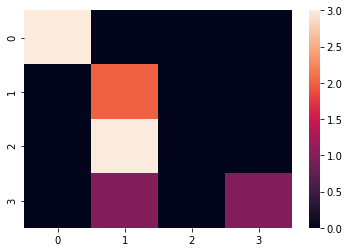

In [28]:
sns.heatmap(confusion_matrix(y_test, predicoes));

In [30]:
print(classification_report(y_test, predicoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.33      1.00      0.50         2
           2       0.00      0.00      0.00         3
           3       1.00      0.50      0.67         2

    accuracy                           0.60        10
   macro avg       0.58      0.62      0.54        10
weighted avg       0.57      0.60      0.53        10



/home/vinicio/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinicio/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinicio/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Resultados inaceitáveis

# 2º teste: Submissão dos dados a uma FFT 

In [35]:
def apply_fft_in_df(dataInt):
    fft_value = np.fft.fft(dataInt)
    absolute_value = np.abs(fft_value).mean()
    imaginary_value = np.imag(fft_value).mean()
    
    return absolute_value, imaginary_value

X_fft = X.apply(apply_fft_in_df, axis=1, result_type='expand')

In [36]:
X_fft.head()

,0,1
0,12531.407364,-2.273737e-13
1,12886.051282,0.000000e+00
2,13147.657471,2.273737e-13
3,11789.206070,0.000000e+00
4,13832.573825,0.000000e+00


## Separação treino e teste 

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_fft, y, test_size=0.2, random_state=42, stratify=y)

# Treino de algoritmo 

In [38]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.500


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.200


NuSVC(gamma='auto', probability=True)
model score: 0.200


DecisionTreeClassifier()
model score: 0.700


RandomForestClassifier()
model score: 0.700


AdaBoostClassifier()
model score: 0.500


GradientBoostingClassifier()
model score: 0.700




In [41]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train_deep = np.asarray(X_train)
y_train_deep = np.asarray(y_train)
X_test_deep = np.asarray(X_test)
y_test_deep = np.asarray(y_test)

In [42]:
model.fit(X_train_deep, y_train_deep, epochs=1000, batch_size=100)

Epoch 1/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.3947
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6761 - accuracy: 0.2632
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.2632
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6400 - accuracy: 0.2632
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6201 - accuracy: 0.2632
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.5990 - accuracy: 0.2632
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5768 - accuracy: 0.2632
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5535 - accuracy: 0.2632
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.5290 - accuracy: 0.2632
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.2632
Epoch 11/1000
1/1 [

1/1 [==============================] - 0s 2ms/step - loss: -46.1397 - accuracy: 0.2632
Epoch 164/1000
1/1 [==============================] - 0s 2ms/step - loss: -47.0887 - accuracy: 0.2632
Epoch 165/1000
1/1 [==============================] - 0s 8ms/step - loss: -48.0513 - accuracy: 0.2632
Epoch 166/1000
1/1 [==============================] - 0s 2ms/step - loss: -49.0276 - accuracy: 0.2632
Epoch 167/1000
1/1 [==============================] - 0s 2ms/step - loss: -50.0177 - accuracy: 0.2632
Epoch 168/1000
1/1 [==============================] - 0s 2ms/step - loss: -51.0217 - accuracy: 0.2632
Epoch 169/1000
1/1 [==============================] - 0s 2ms/step - loss: -52.0397 - accuracy: 0.2632
Epoch 170/1000
1/1 [==============================] - 0s 4ms/step - loss: -53.0718 - accuracy: 0.2632
Epoch 171/1000
1/1 [==============================] - 0s 2ms/step - loss: -54.1180 - accuracy: 0.2632
Epoch 172/1000
1/1 [==============================] - 0s 2ms/step - loss: -55.1786 - accuracy: 0.

1/1 [==============================] - 0s 3ms/step - loss: -173.0785 - accuracy: 0.2632
Epoch 244/1000
1/1 [==============================] - 0s 2ms/step - loss: -175.4223 - accuracy: 0.2632
Epoch 245/1000
1/1 [==============================] - 0s 2ms/step - loss: -177.7874 - accuracy: 0.2632
Epoch 246/1000
1/1 [==============================] - 0s 2ms/step - loss: -180.1737 - accuracy: 0.2632
Epoch 247/1000
1/1 [==============================] - 0s 2ms/step - loss: -182.5815 - accuracy: 0.2632
Epoch 248/1000
1/1 [==============================] - 0s 3ms/step - loss: -185.0108 - accuracy: 0.2632
Epoch 249/1000
1/1 [==============================] - 0s 2ms/step - loss: -187.4617 - accuracy: 0.2632
Epoch 250/1000
1/1 [==============================] - 0s 7ms/step - loss: -189.9343 - accuracy: 0.2632
Epoch 251/1000
1/1 [==============================] - 0s 5ms/step - loss: -192.4287 - accuracy: 0.2632
Epoch 252/1000
1/1 [==============================] - 0s 1ms/step - loss: -194.9450 - ac

1/1 [==============================] - 0s 2ms/step - loss: -862.7850 - accuracy: 0.2632
Epoch 402/1000
1/1 [==============================] - 0s 2ms/step - loss: -869.5435 - accuracy: 0.2632
Epoch 403/1000
1/1 [==============================] - 0s 2ms/step - loss: -876.3365 - accuracy: 0.2632
Epoch 404/1000
1/1 [==============================] - 0s 3ms/step - loss: -883.1639 - accuracy: 0.2632
Epoch 405/1000
1/1 [==============================] - 0s 2ms/step - loss: -890.0258 - accuracy: 0.2632
Epoch 406/1000
1/1 [==============================] - 0s 2ms/step - loss: -896.9221 - accuracy: 0.2632
Epoch 407/1000
1/1 [==============================] - 0s 1ms/step - loss: -903.8531 - accuracy: 0.2632
Epoch 408/1000
1/1 [==============================] - 0s 2ms/step - loss: -910.8187 - accuracy: 0.2632
Epoch 409/1000
1/1 [==============================] - 0s 1ms/step - loss: -917.8192 - accuracy: 0.2632
Epoch 410/1000
1/1 [==============================] - 0s 2ms/step - loss: -924.8542 - ac

1/1 [==============================] - 0s 4ms/step - loss: -1508.2191 - accuracy: 0.2632
Epoch 481/1000
1/1 [==============================] - 0s 3ms/step - loss: -1517.9124 - accuracy: 0.2632
Epoch 482/1000
1/1 [==============================] - 0s 3ms/step - loss: -1527.6454 - accuracy: 0.2632
Epoch 483/1000
1/1 [==============================] - 0s 3ms/step - loss: -1537.4183 - accuracy: 0.2632
Epoch 484/1000
1/1 [==============================] - 0s 2ms/step - loss: -1547.2316 - accuracy: 0.2632
Epoch 485/1000
1/1 [==============================] - 0s 4ms/step - loss: -1557.0850 - accuracy: 0.2632
Epoch 486/1000
1/1 [==============================] - 0s 2ms/step - loss: -1566.9784 - accuracy: 0.2632
Epoch 487/1000
1/1 [==============================] - 0s 1ms/step - loss: -1576.9122 - accuracy: 0.2632
Epoch 488/1000
1/1 [==============================] - 0s 2ms/step - loss: -1586.8864 - accuracy: 0.2632
Epoch 489/1000
1/1 [==============================] - 0s 2ms/step - loss: -1596

1/1 [==============================] - 0s 5ms/step - loss: -3544.0090 - accuracy: 0.2632
Epoch 637/1000
1/1 [==============================] - 0s 5ms/step - loss: -3560.7139 - accuracy: 0.2632
Epoch 638/1000
1/1 [==============================] - 0s 5ms/step - loss: -3577.4683 - accuracy: 0.2632
Epoch 639/1000
1/1 [==============================] - 0s 5ms/step - loss: -3594.2734 - accuracy: 0.2632
Epoch 640/1000
1/1 [==============================] - 0s 4ms/step - loss: -3611.1270 - accuracy: 0.2632
Epoch 641/1000
1/1 [==============================] - 0s 4ms/step - loss: -3628.0308 - accuracy: 0.2632
Epoch 642/1000
1/1 [==============================] - 0s 3ms/step - loss: -3644.9849 - accuracy: 0.2632
Epoch 643/1000
1/1 [==============================] - 0s 8ms/step - loss: -3661.9893 - accuracy: 0.2632
Epoch 644/1000
1/1 [==============================] - 0s 2ms/step - loss: -3679.0427 - accuracy: 0.2632
Epoch 645/1000
1/1 [==============================] - 0s 1ms/step - loss: -3696

1/1 [==============================] - 0s 5ms/step - loss: -6784.6875 - accuracy: 0.2632
Epoch 793/1000
1/1 [==============================] - 0s 5ms/step - loss: -6809.7954 - accuracy: 0.2632
Epoch 794/1000
1/1 [==============================] - 0s 14ms/step - loss: -6834.9600 - accuracy: 0.2632
Epoch 795/1000
1/1 [==============================] - 0s 7ms/step - loss: -6860.1836 - accuracy: 0.2632
Epoch 796/1000
1/1 [==============================] - 0s 6ms/step - loss: -6885.4648 - accuracy: 0.2632
Epoch 797/1000
1/1 [==============================] - 0s 6ms/step - loss: -6910.8042 - accuracy: 0.2632
Epoch 798/1000
1/1 [==============================] - 0s 2ms/step - loss: -6936.2021 - accuracy: 0.2632
Epoch 799/1000
1/1 [==============================] - 0s 2ms/step - loss: -6961.6577 - accuracy: 0.2632
Epoch 800/1000
1/1 [==============================] - 0s 3ms/step - loss: -6987.1719 - accuracy: 0.2632
Epoch 801/1000
1/1 [==============================] - 0s 4ms/step - loss: -701

1/1 [==============================] - 0s 2ms/step - loss: -11429.2432 - accuracy: 0.2632
Epoch 949/1000
1/1 [==============================] - 0s 1ms/step - loss: -11463.9209 - accuracy: 0.2632
Epoch 950/1000
1/1 [==============================] - 0s 2ms/step - loss: -11498.6621 - accuracy: 0.2632
Epoch 951/1000
1/1 [==============================] - 0s 2ms/step - loss: -11533.4697 - accuracy: 0.2632
Epoch 952/1000
1/1 [==============================] - 0s 2ms/step - loss: -11568.3408 - accuracy: 0.2632
Epoch 953/1000
1/1 [==============================] - 0s 2ms/step - loss: -11603.2773 - accuracy: 0.2632
Epoch 954/1000
1/1 [==============================] - 0s 3ms/step - loss: -11638.2783 - accuracy: 0.2632
Epoch 955/1000
1/1 [==============================] - 0s 2ms/step - loss: -11673.3438 - accuracy: 0.2632
Epoch 956/1000
1/1 [==============================] - 0s 2ms/step - loss: -11708.4756 - accuracy: 0.2632
Epoch 957/1000
1/1 [==============================] - 0s 5ms/step - lo

In [43]:
_, accuracy = model.evaluate(X_test_deep, y_test_deep)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 2ms/step - loss: -28115.8789 - accuracy: 0.2000
Accuracy: 20.00


### Notas:
* Performance pifia, NuSVC parece promissor

# Teste do melhor algoritimo com outras métricas

In [39]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)   

DecisionTreeClassifier()

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predicoes = clf.predict(X_test)

In [41]:
accuracy_score(y_test, predicoes)

0.7

In [44]:
confusion_matrix(y_test, predicoes)

array([[3, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 2]])

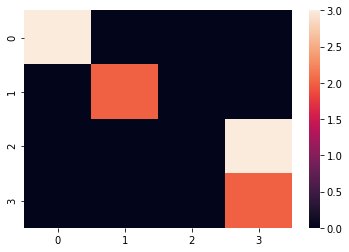

In [45]:
sns.heatmap(confusion_matrix(y_test, predicoes));

In [46]:
print(classification_report(y_test, predicoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         3
           3       0.40      1.00      0.57         2

    accuracy                           0.70        10
   macro avg       0.60      0.75      0.64        10
weighted avg       0.58      0.70      0.61        10



/home/vinicio/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinicio/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinicio/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Resultados melhoraram, mas ainda estao bem ruins. Por exemplo na classe 2 (Sobrecarga)

In [49]:
lbl_enc.classes_

array(['0 - Regime Normal/', '1 - Falta de tensão/', '2 - Sobrecarga/',
       '3 - Desbalanceamento do eixo/'], dtype=object)

# 3º Teste: obter os valores de média, minimo e máximo e a média da parte real e imaginária da FFT 

In [50]:
def transform_array(arr):
    mean = arr.mean()
    minimun = arr.min()
    maximun = arr.max()
    
    fft_value = np.fft.fft(arr)
    real_part = np.abs(fft_value).mean()
    imaginary_part = np.imag(fft_value).mean()
    
    return np.array([mean, minimun, maximun, real_part, imaginary_part])

In [51]:
transform_array(X.iloc[0])

array([ 5.56007812e+02, -3.76700000e+03,  3.99400000e+03,  1.25314074e+04,
       -2.27373675e-13])

In [53]:
X_transform = X.apply(transform_array, axis=1, result_type='expand')
X_transform.columns = ['Média', 'Minímo', 'Máximo', 'FFT Real', 'FFT Imaginário']
X_transform.head()

,Média,Minímo,Máximo,FFT Real,FFT Imaginário
0,556.007812,-3767.0,3994.0,12531.407364,-2.273737e-13
1,296.060547,-3701.0,4180.0,12886.051282,0.000000e+00
2,268.788574,-4023.0,4593.0,13147.657471,2.273737e-13
3,650.110840,-4091.0,4305.0,11789.206070,0.000000e+00
4,313.874023,-3681.0,4748.0,13832.573825,0.000000e+00


In [54]:
X_output = X_transform.copy()
X_output['class'] = y

X_output.to_csv('Saídas/X_transform.csv')

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.600


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.400


NuSVC(gamma='auto', probability=True)
model score: 0.400


DecisionTreeClassifier()
model score: 0.600


RandomForestClassifier()
model score: 0.600


AdaBoostClassifier()
model score: 0.700


GradientBoostingClassifier()
model score: 0.700




In [91]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train_deep = np.asarray(X_train)
y_train_deep = np.asarray(y_train)
X_test_deep = np.asarray(X_test)
y_test_deep = np.asarray(y_test)

In [92]:
model.fit(X_train_deep, y_train_deep, epochs=1000, batch_size=100)

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 2132.4158 - accuracy: 0.2895
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 2071.8445 - accuracy: 0.2895
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 2011.1891 - accuracy: 0.2895
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 1949.2308 - accuracy: 0.2895
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 1887.4529 - accuracy: 0.2895
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 1825.8774 - accuracy: 0.2895
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 1764.5183 - accuracy: 0.2895
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 1703.3597 - accuracy: 0.2895
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 1641.9474 - accuracy: 0.2895
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 1580.6428 - accura

1/1 [==============================] - 0s 2ms/step - loss: -1298.6826 - accuracy: 0.2632
Epoch 161/1000
1/1 [==============================] - 0s 2ms/step - loss: -1312.5896 - accuracy: 0.2632
Epoch 162/1000
1/1 [==============================] - 0s 12ms/step - loss: -1326.5967 - accuracy: 0.2632
Epoch 163/1000
1/1 [==============================] - 0s 5ms/step - loss: -1340.7385 - accuracy: 0.2632
Epoch 164/1000
1/1 [==============================] - 0s 2ms/step - loss: -1355.0343 - accuracy: 0.2632
Epoch 165/1000
1/1 [==============================] - 0s 2ms/step - loss: -1369.4307 - accuracy: 0.2632
Epoch 166/1000
1/1 [==============================] - 0s 4ms/step - loss: -1383.9615 - accuracy: 0.2632
Epoch 167/1000
1/1 [==============================] - 0s 4ms/step - loss: -1398.6182 - accuracy: 0.2632
Epoch 168/1000
1/1 [==============================] - 0s 4ms/step - loss: -1413.4105 - accuracy: 0.2632
Epoch 169/1000
1/1 [==============================] - 0s 4ms/step - loss: -142

1/1 [==============================] - 0s 1ms/step - loss: -5898.4985 - accuracy: 0.2632
Epoch 317/1000
1/1 [==============================] - 0s 5ms/step - loss: -5952.0518 - accuracy: 0.2632
Epoch 318/1000
1/1 [==============================] - 0s 2ms/step - loss: -6006.0420 - accuracy: 0.2632
Epoch 319/1000
1/1 [==============================] - 0s 4ms/step - loss: -6060.4761 - accuracy: 0.2632
Epoch 320/1000
1/1 [==============================] - 0s 7ms/step - loss: -6115.3550 - accuracy: 0.2632
Epoch 321/1000
1/1 [==============================] - 0s 6ms/step - loss: -6170.6816 - accuracy: 0.2632
Epoch 322/1000
1/1 [==============================] - 0s 4ms/step - loss: -6226.4590 - accuracy: 0.2632
Epoch 323/1000
1/1 [==============================] - 0s 5ms/step - loss: -6282.6890 - accuracy: 0.2632
Epoch 324/1000
1/1 [==============================] - 0s 5ms/step - loss: -6339.3711 - accuracy: 0.2632
Epoch 325/1000
1/1 [==============================] - 0s 5ms/step - loss: -6396

1/1 [==============================] - 0s 2ms/step - loss: -21181.3789 - accuracy: 0.2632
Epoch 473/1000
1/1 [==============================] - 0s 2ms/step - loss: -21334.7129 - accuracy: 0.2632
Epoch 474/1000
1/1 [==============================] - 0s 3ms/step - loss: -21488.8945 - accuracy: 0.2632
Epoch 475/1000
1/1 [==============================] - 0s 2ms/step - loss: -21643.9141 - accuracy: 0.2632
Epoch 476/1000
1/1 [==============================] - 0s 3ms/step - loss: -21799.7793 - accuracy: 0.2632
Epoch 477/1000
1/1 [==============================] - 0s 2ms/step - loss: -21956.4941 - accuracy: 0.2632
Epoch 478/1000
1/1 [==============================] - 0s 9ms/step - loss: -22114.0547 - accuracy: 0.2632
Epoch 479/1000
1/1 [==============================] - 0s 5ms/step - loss: -22272.4707 - accuracy: 0.2632
Epoch 480/1000
1/1 [==============================] - 0s 6ms/step - loss: -22431.7422 - accuracy: 0.2632
Epoch 481/1000
1/1 [==============================] - 0s 5ms/step - lo

1/1 [==============================] - 0s 2ms/step - loss: -55922.7422 - accuracy: 0.2632
Epoch 626/1000
1/1 [==============================] - 0s 15ms/step - loss: -56233.8555 - accuracy: 0.2632
Epoch 627/1000
1/1 [==============================] - 0s 1ms/step - loss: -56546.1719 - accuracy: 0.2632
Epoch 628/1000
1/1 [==============================] - 0s 1ms/step - loss: -56859.6836 - accuracy: 0.2632
Epoch 629/1000
1/1 [==============================] - 0s 2ms/step - loss: -57174.3945 - accuracy: 0.2632
Epoch 630/1000
1/1 [==============================] - 0s 6ms/step - loss: -57490.3008 - accuracy: 0.2632
Epoch 631/1000
1/1 [==============================] - 0s 1ms/step - loss: -57807.4219 - accuracy: 0.2632
Epoch 632/1000
1/1 [==============================] - 0s 1ms/step - loss: -58125.7383 - accuracy: 0.2632
Epoch 633/1000
1/1 [==============================] - 0s 2ms/step - loss: -58445.2617 - accuracy: 0.2632
Epoch 634/1000
1/1 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: -83893.0078 - accuracy: 0.2632
Epoch 704/1000
1/1 [==============================] - 0s 2ms/step - loss: -84301.6719 - accuracy: 0.2632
Epoch 705/1000
1/1 [==============================] - 0s 2ms/step - loss: -84711.6406 - accuracy: 0.2632
Epoch 706/1000
1/1 [==============================] - 0s 4ms/step - loss: -85122.8828 - accuracy: 0.2632
Epoch 707/1000
1/1 [==============================] - 0s 2ms/step - loss: -85535.4531 - accuracy: 0.2632
Epoch 708/1000
1/1 [==============================] - 0s 4ms/step - loss: -85949.3203 - accuracy: 0.2632
Epoch 709/1000
1/1 [==============================] - 0s 2ms/step - loss: -86364.5078 - accuracy: 0.2632
Epoch 710/1000
1/1 [==============================] - 0s 6ms/step - loss: -86780.9688 - accuracy: 0.2632
Epoch 711/1000
1/1 [==============================] - 0s 4ms/step - loss: -87198.7578 - accuracy: 0.2632
Epoch 712/1000
1/1 [==============================] - 0s 5ms/step - lo

1/1 [==============================] - 0s 2ms/step - loss: -162141.7969 - accuracy: 0.2632
Epoch 857/1000
1/1 [==============================] - ETA: 0s - loss: -162761.1719 - accuracy: 0.26 - 0s 3ms/step - loss: -162761.1719 - accuracy: 0.2632
Epoch 858/1000
1/1 [==============================] - 0s 2ms/step - loss: -163381.9688 - accuracy: 0.2632
Epoch 859/1000
1/1 [==============================] - 0s 2ms/step - loss: -164004.2656 - accuracy: 0.2632
Epoch 860/1000
1/1 [==============================] - 0s 2ms/step - loss: -164628.0000 - accuracy: 0.2632
Epoch 861/1000
1/1 [==============================] - 0s 2ms/step - loss: -165253.2031 - accuracy: 0.2632
Epoch 862/1000
1/1 [==============================] - 0s 2ms/step - loss: -165879.8281 - accuracy: 0.2632
Epoch 863/1000
1/1 [==============================] - 0s 2ms/step - loss: -166507.9062 - accuracy: 0.2632
Epoch 864/1000
1/1 [==============================] - 0s 2ms/step - loss: -167137.4688 - accuracy: 0.2632
Epoch 865/100

1/1 [==============================] - 0s 3ms/step - loss: -213407.6562 - accuracy: 0.2632
Epoch 933/1000
1/1 [==============================] - 0s 2ms/step - loss: -214139.6875 - accuracy: 0.2632
Epoch 934/1000
1/1 [==============================] - 0s 9ms/step - loss: -214873.2656 - accuracy: 0.2632
Epoch 935/1000
1/1 [==============================] - 0s 5ms/step - loss: -215608.2969 - accuracy: 0.2632
Epoch 936/1000
1/1 [==============================] - 0s 2ms/step - loss: -216344.9062 - accuracy: 0.2632
Epoch 937/1000
1/1 [==============================] - 0s 17ms/step - loss: -217083.0000 - accuracy: 0.2632
Epoch 938/1000
1/1 [==============================] - 0s 6ms/step - loss: -217822.6250 - accuracy: 0.2632
Epoch 939/1000
1/1 [==============================] - 0s 5ms/step - loss: -218563.7500 - accuracy: 0.2632
Epoch 940/1000
1/1 [==============================] - 0s 4ms/step - loss: -219306.3906 - accuracy: 0.2632
Epoch 941/1000
1/1 [==============================] - 0s 5ms

In [93]:
_, accuracy = model.evaluate(X_test_deep, y_test_deep)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 1ms/step - loss: -1067540.2500 - accuracy: 0.2000
Accuracy: 20.00


### Notas
* Melhoria significativa em disversos algoritmos
* Redes Neurais ainda se mostram muito ineficientes

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)  
predicoes = clf.predict(X_test)

In [60]:
accuracy_score(y_test, predicoes)

0.7

In [61]:
confusion_matrix(y_test, predicoes)

array([[3, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 2]])

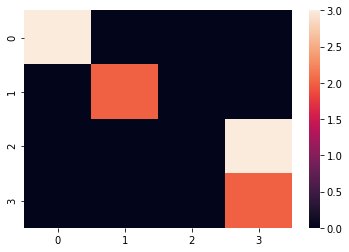

In [62]:
sns.heatmap(confusion_matrix(y_test, predicoes));

In [64]:
print(classification_report(y_test, predicoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         3
           3       0.40      1.00      0.57         2

    accuracy                           0.70        10
   macro avg       0.60      0.75      0.64        10
weighted avg       0.58      0.70      0.61        10



/home/vinicio/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinicio/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinicio/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
lbl_enc.inverse_transform([0,1,2,3])

array(['0 - Regime Normal/', '1 - Falta de tensão/', '2 - Sobrecarga/',
       '3 - Desbalanceamento do eixo/'], dtype=object)

## Notas
* O algoritmo está com dificuldades para classificar corretamente a 'Sobrecarga', confundindo com "Desbalanceamento de eixo", entretanto. identifica perfeitamente a 'Falta de Tensão' e o 'Regime Normal'

# 4º Teste: Aplicando um filtro passa alta nos dados da fft

In [225]:
def transform_array(arr, filter_limit = 50):    
    arr = arr.values   
    
    mean = arr.mean()
    minimun = arr.min()
    maximun = arr.max()        
   
    fft_filtered = arr[np.where(arr > filter_limit)]
    fft_value = np.fft.fft(fft_filtered)   
    
    real_part = np.abs(fft_value).mean()
    imaginary_part = np.imag(fft_value).mean()    

    return np.array([mean, minimun, maximun, real_part, imaginary_part])



X_transform = X.apply(transform_array, axis=1, result_type='expand')
X_transform.columns = ['Média', 'Minímo', 'Máximo', 'FFT Real', 'FFT Imaginário']
X_transform.head()

,Média,Minímo,Máximo,FFT Real,FFT Imaginário
0,554.882080,-3767.0,3994.0,11589.869114,0.000000e+00
1,296.223511,-3701.0,4180.0,9802.488175,0.000000e+00
2,269.204956,-4023.0,4593.0,9329.897318,1.006183e-13
3,648.948853,-4091.0,4305.0,10910.757370,-9.629059e-14
4,313.174927,-3681.0,4748.0,10234.674780,2.221666e-13


In [226]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42, stratify=y)

In [227]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.400


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.400


NuSVC(gamma='auto', probability=True)
model score: 0.400


DecisionTreeClassifier()
model score: 0.600


RandomForestClassifier()
model score: 0.600


AdaBoostClassifier()
model score: 0.700


GradientBoostingClassifier()
model score: 0.600




In [228]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)  
predicoes = clf.predict(X_test)

In [229]:
confusion_matrix(y_test, predicoes)

array([[2, 0, 1, 0],
       [0, 2, 0, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 2]])

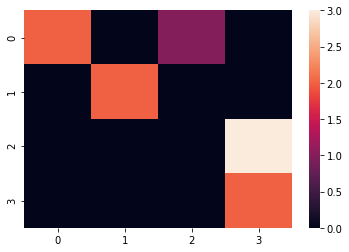

In [230]:
sns.heatmap(confusion_matrix(y_test, predicoes));

In [231]:
print(classification_report(y_test, predicoes))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         3
           3       0.40      1.00      0.57         2

    accuracy                           0.60        10
   macro avg       0.60      0.67      0.59        10
weighted avg       0.58      0.60      0.55        10



# Notas:
* O algoritmo continua performando mal para diferenciar as classe "2"
* Será que um ganho no sinal ajudaria?

# 5º Teste: Aplicando um ganho na parte imaginaria com as técnicas do 3º teste

In [76]:
ganho = 0.5

def ganho_audio(row):
    row[4] = row[4] * ganho
    return row

In [165]:
X_transform = X.apply(transform_array, axis=1, result_type='expand')
X_ganho = X_transform.apply(ganho_audio, axis=1, result_type='expand')
X_ganho.columns = ['Média', 'Minímo', 'Máximo', 'FFT Real', 'FFT Imaginário']
X_ganho.head()

,Média,Minímo,Máximo,FFT Real,FFT Imaginário
0,554.882080,-3767.0,3994.0,13166.182490,1.136868e-13
1,296.223511,-3701.0,4180.0,12889.192796,0.000000e+00
2,269.204956,-4023.0,4593.0,13243.276390,-2.842171e-13
3,648.948853,-4091.0,4305.0,12774.496969,1.136868e-13
4,313.174927,-3681.0,4748.0,13998.603559,2.273737e-13


In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ganho, y, test_size=0.2, random_state=42, stratify=y)

In [167]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.600


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.400


NuSVC(gamma='auto', probability=True)
model score: 0.400


DecisionTreeClassifier()
model score: 0.600


RandomForestClassifier()
model score: 0.600


AdaBoostClassifier()
model score: 0.700


GradientBoostingClassifier()
model score: 0.700




In [138]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)  
predicoes = clf.predict(X_test)

In [139]:
confusion_matrix(y_test, predicoes)

array([[2, 0, 1, 0],
       [0, 2, 0, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 2]])

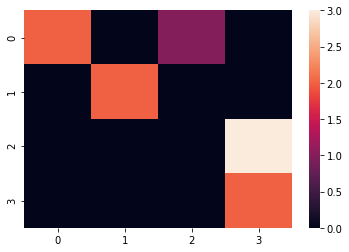

In [140]:
sns.heatmap(confusion_matrix(y_test, predicoes));

In [141]:
print(classification_report(y_test, predicoes))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         3
           3       0.40      1.00      0.57         2

    accuracy                           0.60        10
   macro avg       0.60      0.67      0.59        10
weighted avg       0.58      0.60      0.55        10



# 6º Teste: Aplicando faixas de frequencia ao conjunto de dados

Sera verificado se o conjunto de dados possui um valor minimo em alguns agrupamentos de frequencias nas seguintes faixas:

* 0-250
* 250-500
* 500-750
* 750-1000
* 1000-1250
* maiores que 1250

In [503]:
X_fft = np.fft.fft(X)
X_fft = 2.0/n * np.abs(X_fft[:n//2])
arr_dataset_mean = X_fft.mean(axis=0)

ranges = (
        (0, 100),
        (250, 750),
        (750, 1250),
        (1250, 2000),
)


def mean_amplitude_by_freq_range(arr, high, low, sample_rate = 22050):
    n = len(data)
    T = 1/sample_rate

    amplitude = np.fft.fft(arr) # Aplica a FFT no audio
    amplitude = 2.0/n * np.abs(amplitude[:n//2]) # Módulo da amplitude
    frequency = np.linspace(0.0, 1.0/(2.0*T), n//2) # Cria um array contendo as frequencias
    min_index = np.argmax(frequency >= low)
    max_index = np.argmax(frequency >= high)

    return amplitude[min_index:max_index].mean()
    
    
def get_ranges(row, ranges):    
    arr_out = []   
    
    for low, high in ranges:      
        dataset_mean = mean_amplitude_by_freq_range(arr_dataset_mean, high, low)
        register_mean = mean_amplitude_by_freq_range(row, high, low)
        
        # Se o valor do registro for maior que a média considerar a faixa como verdadeira
        if register_mean >= 1.5 * dataset_mean:
            arr_out.append(1)
        else:
            arr_out.append(0)
    
    return arr_out


X_extract = pd.DataFrame([get_ranges(r, ranges) for r in X.values])
X_extract.columns = [str(l) + "-" + str(h) for l, h in ranges]

In [504]:
X_extract

,0-100,250-750,750-1250,1250-2000
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,1
8,1,1,1,1
9,1,1,1,1


### Baixa variacao, aumentar o numero de faixas

In [507]:
X_fft = np.fft.fft(X)
X_fft = 2.0/n * np.abs(X_fft[:n//2])
arr_dataset_mean = X_fft.mean(axis=0)

ranges = (
        (0, 100),
        (100, 200),
        (200, 300),
        (300, 400),
        (400, 500),
        (500, 600),
        (600, 700),
        (700, 800),
        (800, 900),
        (900, 1000),
        (1000, 1100),
        (1100, 1200),
        (1200, 2000),
)


def mean_amplitude_by_freq_range(arr, high, low, sample_rate = 22050):
    n = len(data)
    T = 1/sample_rate

    amplitude = np.fft.fft(arr) # Aplica a FFT no audio
    amplitude = 2.0/n * np.abs(amplitude[:n//2]) # Módulo da amplitude
    frequency = np.linspace(0.0, 1.0/(2.0*T), n//2) # Cria um array contendo as frequencias
    min_index = np.argmax(frequency >= low)
    max_index = np.argmax(frequency >= high)

    return amplitude[min_index:max_index].mean()
    
    
def get_ranges(row, ranges):    
    arr_out = []   
    
    for low, high in ranges:      
        dataset_mean = mean_amplitude_by_freq_range(arr_dataset_mean, high, low)
        register_mean = mean_amplitude_by_freq_range(row, high, low)
        
        # Se o valor do registro for maior que a média considerar a faixa como verdadeira
        if register_mean >= 1.5 * dataset_mean:
            arr_out.append(1)
        else:
            arr_out.append(0)
    
    return arr_out


X_extract = pd.DataFrame([get_ranges(r, ranges) for r in X.values])
X_extract.columns = [str(l) + "-" + str(h) for l, h in ranges]

In [508]:
X_extract

,0-100,100-200,200-300,300-400,400-500,500-600,600-700,700-800,800-900,900-1000,1000-1100,1100-1200,1200-2000
0,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,1,1,1


In [509]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_extract, y, test_size=0.2, random_state=42, stratify=y)

In [510]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.500


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.300


NuSVC(gamma='auto', probability=True)
model score: 0.300


DecisionTreeClassifier()
model score: 0.600


RandomForestClassifier()
model score: 0.400


AdaBoostClassifier()
model score: 0.600


GradientBoostingClassifier()
model score: 0.600




In [511]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)  
predicoes = clf.predict(X_test)

In [512]:
confusion_matrix(y_test, predicoes)

array([[3, 0, 0, 0],
       [0, 2, 0, 0],
       [1, 0, 0, 2],
       [1, 0, 0, 1]])

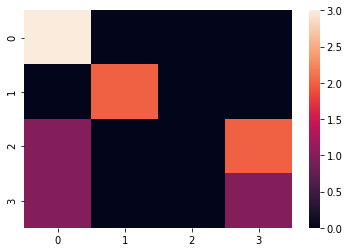

In [513]:
sns.heatmap(confusion_matrix(y_test, predicoes));

In [514]:
print(classification_report(y_test, predicoes))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         3
           3       0.33      0.50      0.40         2

    accuracy                           0.60        10
   macro avg       0.48      0.62      0.54        10
weighted avg       0.45      0.60      0.51        10



/home/vinicio/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinicio/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinicio/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conclusões:

* Algoritmo ainda nao consegue diferenciar desbalanceamento de eixo
* Melhor metodo ate o momento: Método 3.

## Utilização da busca em grade para obter os melhores parâmetros da árvore de decisão

In [522]:
X_transform = X.apply(transform_array, axis=1, result_type='expand')
X_transform.columns = ['Média', 'Minímo', 'Máximo', 'FFT Real', 'FFT Imaginário']
X_transform.head()

,Média,Minímo,Máximo,FFT Real,FFT Imaginário
0,554.882080,-3767.0,3994.0,11589.869114,0.000000e+00
1,296.223511,-3701.0,4180.0,9802.488175,0.000000e+00
2,269.204956,-4023.0,4593.0,9329.897318,1.006183e-13
3,648.948853,-4091.0,4305.0,10910.757370,-9.629059e-14
4,313.174927,-3681.0,4748.0,10234.674780,2.221666e-13


In [523]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42, stratify=y)

In [540]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


criterion = ['gini', 'entropy']
max_depth = [2, 3, 4, 6, 8, 10, 12]
min_samples_split = [2, 3, 4, 6, 8, 10, 12]
    
parameters = {                
                'criterion':criterion, 
                'max_depth':max_depth, 
                'min_samples_split':min_samples_split
             }

dec_tree = DecisionTreeClassifier()
clf = GridSearchCV(dec_tree, parameters, scoring='f1_macro')

In [542]:
grid_search = clf.fit(X_train, y_train)

In [543]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 12}

In [544]:
best_clf = grid_search.best_estimator_

In [545]:
predicoes = best_clf.predict(X_test)
print(classification_report(y_test, predicoes))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         3
           3       0.40      1.00      0.57         2

    accuracy                           0.60        10
   macro avg       0.60      0.67      0.59        10
weighted avg       0.58      0.60      0.55        10



In [159]:
lbl_enc.classes_

array(['0 - Regime Normal/', '1 - Falta de tensão/', '2 - Sobrecarga/',
       '3 - Desbalanceamento do eixo/'], dtype=object)

**Agora o algoritmo esta confundindo a Sobrecarga com o Regime normal**

# Concluoes:

* Apenas aplicar a FFT
* Classificador GradientBoostingClassifier como preditor

# Resumo de exportação (modelo criado + funções de tratamento de dados)

#### Funções utilizadas

In [547]:
import numpy as np

def transform_array(arr):
    """ Esta função retorna os valores médios, minimos, 
    máximos e a média das componentes real e imaginária da FFT"""
    
    mean = arr.mean()
    minimun = arr.min()
    maximun = arr.max()
    
    fft_value = np.fft.fft(arr)
    real_part = np.abs(fft_value).mean()
    imaginary_part = np.imag(fft_value).mean()
    
    return np.array([mean, minimun, maximun, real_part, imaginary_part])

#### Treino do modelo

In [548]:
X_transform = X.apply(transform_array, axis=1, result_type='expand')
X_transform.columns = ['Média', 'Minímo', 'Máximo', 'FFT Real', 'FFT Imaginário']
X_transform.head()

,Média,Minímo,Máximo,FFT Real,FFT Imaginário
0,554.882080,-3767.0,3994.0,13166.182490,2.273737e-13
1,296.223511,-3701.0,4180.0,12889.192796,0.000000e+00
2,269.204956,-4023.0,4593.0,13243.276390,-5.684342e-13
3,648.948853,-4091.0,4305.0,12774.496969,2.273737e-13
4,313.174927,-3681.0,4748.0,13998.603559,4.547474e-13


In [549]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42, stratify=y)

clf = GradientBoostingClassifier()

clf.fit(X_train, y_train)

GradientBoostingClassifier()

#### Exportação do modelo criado

In [550]:
import pickle as pkl


with open('Preditores/classificador_som_ambiente.pkl', 'wb') as best_file:
    pkl.dump(clf, best_file)